# Chapter 0. Visualization

Ildar Rakhmatulin ildarr2016@gmail.com

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import mne

## Import Dataset

Load dataset https://github.com/Ildaron/ironbci   

Channel labels according to the international 10-20 system EEG Placement:

* Ch1 - Fz  
* Ch2 - Cz  
* Ch3 - Pz  
* Ch4 - T3  
* Ch5 - C3  
* Ch6 - Fp1     
* Ch7 - C4  
* Ch8 - T4  

In [2]:
# load the Excel file as a DataFrame
eeg_data = pd.read_excel("../dataset/dataset.xlsx")
# convert from Digital Value of Analog Digital converter (ADC) ADS1299 to microvolts
eeg_data = round(1000000*4.5*(eeg_data/16777215),2)  
display(eeg_data.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,6410.24,791.55,9774.56,10304.67,3329.94,1008.38,8315.22,14155.44
1,6415.23,817.54,9780.35,10284.74,3338.84,999.47,8323.54,14007.41
2,6433.25,844.41,9796.80,10461.31,3358.23,965.94,8342.53,14262.67
3,6441.81,853.83,9803.88,10622.30,3365.77,931.53,8350.58,14621.96
4,6426.65,821.02,9788.67,10529.52,3346.22,952.10,8331.45,14570.11


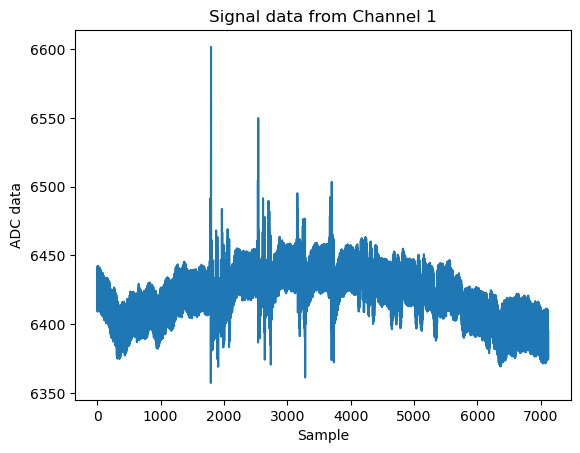

In [3]:
# select the data from the first channel
channel = 0
channel_data = eeg_data.iloc[:, channel]

# plot the EEG data
plt.plot(channel_data)
plt.title("Signal data from Channel 1")
plt.ylabel('ADC data')  # Data from ADS1299
plt.xlabel('Sample')
plt.show()

## Band Pass Filter

Band-pass filtering is a common signal processing technique used in EEG (Electroencephalography) data analysis to isolate specific frequency bands of interest while removing unwanted frequencies. Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  

You can read more about band-pass filter in [Chapter 1](https://graceful-kelpie-579688.netlify.app/chapters/chapter_1-band_pass_filter).


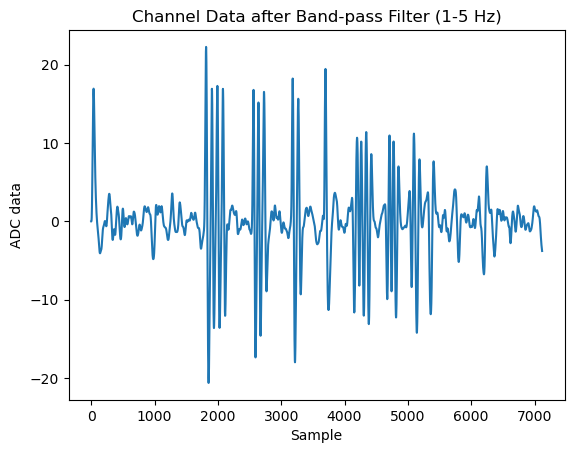

In [4]:
def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

channel_data_bp_filtered = channel_data.copy()  # copy the data
fps = 250  # sampling frequency 
cutoff_high = 1  # cutoff frequency of the high-pass filter
cutoff_low = 5  # cutoff frequency of the low-pass filter
nyq = 0.5 * fps  # Nyquist frequency (half of the sampling frequency)

# apply the band-pass filter
channel_data_bp_filtered = butter_highpass_filter(
    data=channel_data_bp_filtered, 
    cutoff=cutoff_high, 
    nyq=nyq,
    order=5)
channel_data_bp_filtered = butter_lowpass_filter(
    data=channel_data_bp_filtered, 
    cutoff=cutoff_low, 
    nyq=nyq,
    order=4)

plt.plot(channel_data_bp_filtered)
plt.title("Channel Data after Band-pass Filter (1-5 Hz)")
plt.ylabel('ADC data')
plt.xlabel('Sample')
plt.show()

In [5]:
# filter the whole dataset
eeg_data_filtered = eeg_data.copy()
for channel in range(eeg_data.shape[1]):
    eeg_data_filtered.iloc[:, channel] = butter_highpass_filter(
        data=eeg_data.iloc[:, channel], 
        cutoff=cutoff_high, 
        nyq=nyq,
        order=5)
    eeg_data_filtered.iloc[:, channel] = butter_lowpass_filter(
        data=eeg_data_filtered.iloc[:, channel], 
        cutoff=cutoff_low, 
        nyq=nyq,
        order=4)
display(eeg_data_filtered.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,0.000082,0.000128,0.000083,0.000792,0.000095,-0.000170,0.000090,0.001276
1,0.000769,0.001442,0.000792,0.006556,0.000941,-0.001583,0.000883,0.009034
2,0.003852,0.008070,0.003976,0.029509,0.004839,-0.007789,0.004549,0.033917
3,0.013686,0.030162,0.014048,0.099633,0.017333,-0.027453,0.016352,0.100893
4,0.038219,0.085239,0.038850,0.278613,0.048195,-0.077183,0.045659,0.275196


## Visualisation

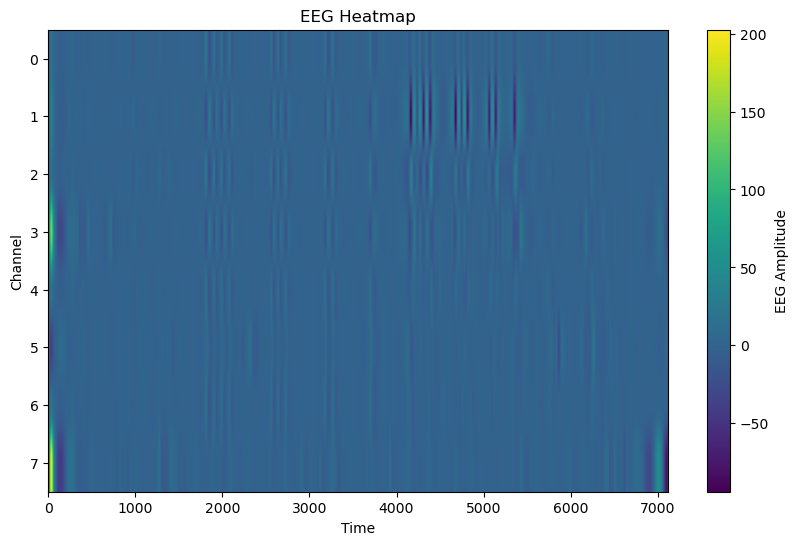

In [6]:
# create the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(eeg_data_filtered.T, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, label='EEG Amplitude')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.title('EEG Heatmap')
plt.show()

## 3D graph

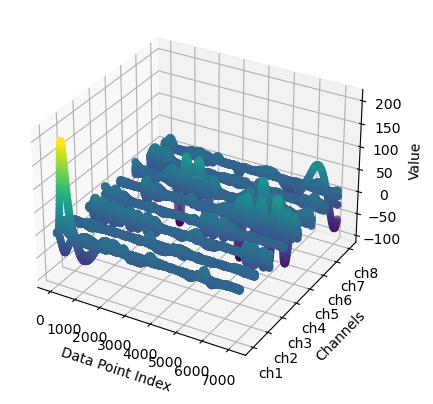

In [7]:
channel_names = ["ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(eeg_data_filtered.shape[0]), np.arange(len(channel_names)))

z = eeg_data_filtered.values.flatten()
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Data Point Index')
ax.set_ylabel('Channels')
ax.set_zlabel('Value')

ax.set_yticks(np.arange(len(channel_names)))
ax.set_yticklabels(channel_names)

plt.show()

## Heat map

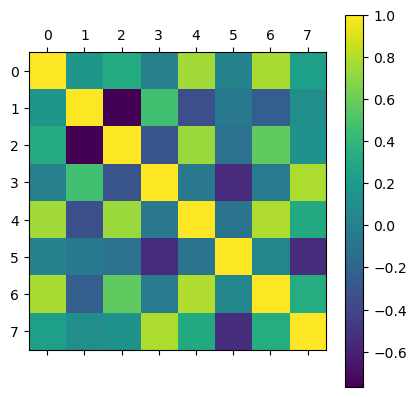

In [9]:
plt.matshow(eeg_data_filtered.corr())
plt.colorbar()
plt.show()

https://mne.tools/stable/auto_examples/io/read_noise_covariance_matrix.html#sphx-glr-auto-examples-io-read-noise-covariance-matrix-py

## MNE Topomap

In [10]:
data_after_band_pass_filter = np.array(eeg_data_filtered)
data_after_band_pass_filter = data_after_band_pass_filter.reshape((8, 7120))
data_after_band_pass_filter = pd.DataFrame(data_after_band_pass_filter)

standard_montage = mne.channels.make_standard_montage('standard_alphabetic')
n_channels = 8
fake_info = mne.create_info(
    ch_names=["Fp1", "Fz", "Cz", "Pz", "T3", "C3", "C4", "T4"],
    sfreq=250.,
    ch_types='eeg')
print (fake_info)

fake_evoked = mne.EvokedArray(data_after_band_pass_filter, fake_info)
fake_evoked.set_montage(standard_montage, on_missing='ignore')

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, Cz, Pz, T3, C3, C4, T4
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


<Evoked | '' (average, N=1), 0 – 28.476 s, baseline off, 8 ch, ~463 kB>

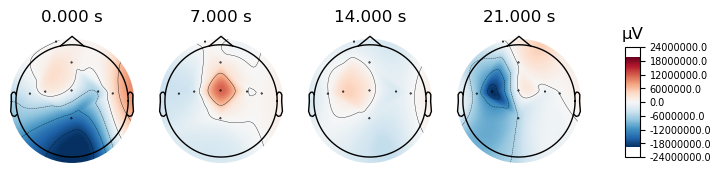

In [11]:
times_to_plot = np.arange(0, 28., 7)
fake_evoked.plot_topomap(times_to_plot, ch_type="eeg", ncols=len(times_to_plot), nrows="auto");